# Imports

In [99]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import math
import time

import warnings
warnings.filterwarnings('ignore')

from sklearnex import patch_sklearn
patch_sklearn()

# from lazypredict.Supervised import LazyRegressor

# Visualization
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

# Feature and Model Selection
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

# Models
# Linear
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import Lars
from sklearn.linear_model import TweedieRegressor
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoLars
from sklearn.linear_model import LassoLarsCV
from sklearn.linear_model import LassoLarsIC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LarsCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

# Ensemble
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor

# SVM
from sklearn.svm import SVR
from sklearn.svm import NuSVR
from sklearn.svm import LinearSVR

# Other
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.dummy import DummyRegressor
from sklearn.kernel_ridge import KernelRidge

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


# EDA

In [100]:
# !wget https://raw.githubusercontent.com/BKHV/risk_models/master/data/PD-data-train.csv
# !wget https://raw.githubusercontent.com/BKHV/risk_models/master/data/PD-data-test.csv
# !wget https://raw.githubusercontent.com/BKHV/risk_models/master/data/PD-data-desc.csv

In [101]:
train_df = pd.read_csv('PD-data-train.csv', sep=';')
test_df = pd.read_csv('PD-data-test.csv', sep=';')
desc_df = pd.read_csv('PD-data-desc.csv', sep=';')

## Exploring Train Data

In [102]:
train_df.head()

,record_id,ar_revenue,ar_total_expenses,ar_sale_cost,ar_selling_expenses,ar_management_expenses,ar_sale_profit,ar_balance_of_rvns_and_expns,ar_profit_before_tax,ar_taxes,...,adr_actual_age,head_actual_age,cap_actual_age,ul_staff_range,ul_capital_sum,ul_founders_cnt,ul_branch_cnt,ul_strategic_flg,ul_systematizing_flg,default_12m
0,7,52996000.0,48344000.0,48344000.0,0.0,0.0,4652000.0,-2608000.0,2044000.0,846000.0,...,3,3,3,[1-100],50000.0,2,0,0,0,0
1,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12,12,12,[1-100],10000.0,5,0,0,0,0
2,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28,28,28,[1-100],10000.0,2,0,0,0,0
3,22,32049000.0,29568000.0,29568000.0,0.0,0.0,2481000.0,-260000.0,2221000.0,302000.0,...,8,8,8,[1-100],300000.0,1,0,0,0,0
4,23,16458000.0,14935000.0,14935000.0,0.0,0.0,1523000.0,-274000.0,1249000.0,538000.0,...,27,27,27,[1-100],10000.0,2,0,0,0,0


In [103]:
print('Number of rows in train_df: ', train_df.shape[0])
print('Number of columns in train_df: ', train_df.shape[1])
print('Number of values in train_df: ', train_df.count().sum())
print('Number of NaNs in train_df: ', sum(train_df.isna().sum()))
print('Number of NaNs in train_df in all columns:\n')
print(train_df.isna().sum())

Number of rows in train_df:  32395
Number of columns in train_df:  37
Number of values in train_df:  835135
Number of NaNs in train_df:  363480
Number of NaNs in train_df in all columns:

record_id                           0
ar_revenue                      15145
ar_total_expenses               15145
ar_sale_cost                    15145
ar_selling_expenses             15145
ar_management_expenses          15145
ar_sale_profit                  15145
ar_balance_of_rvns_and_expns    15145
ar_profit_before_tax            15145
ar_taxes                        15145
ar_other_profit_and_losses      15145
ar_net_profit                   15145
ab_immobilized_assets           15145
ab_mobile_current_assets        15145
ab_inventory                    15145
ab_accounts_receivable          15145
ab_other_current_assets         15145
ab_cash_and_securities          15145
ab_losses                       15145
ab_own_capital                  15145
ab_borrowed_capital             15145
ab_long_term_l

In [104]:
train_df.describe()

,record_id,ar_revenue,ar_total_expenses,ar_sale_cost,ar_selling_expenses,ar_management_expenses,ar_sale_profit,ar_balance_of_rvns_and_expns,ar_profit_before_tax,ar_taxes,...,ogrn_age,adr_actual_age,head_actual_age,cap_actual_age,ul_capital_sum,ul_founders_cnt,ul_branch_cnt,ul_strategic_flg,ul_systematizing_flg,default_12m
count,32395.000000,1.725000e+04,1.725000e+04,1.725000e+04,1.725000e+04,1.725000e+04,1.725000e+04,1.725000e+04,1.725000e+04,1.725000e+04,...,32395.000000,32395.000000,32395.000000,32395.000000,3.239500e+04,32395.000000,32395.000000,32395.000000,32395.0,32395.000000
mean,136955.533601,8.153776e+07,7.678474e+07,7.320328e+07,2.499198e+06,1.082263e+06,4.753016e+06,-6.424773e+05,4.110538e+06,4.188071e+05,...,78.644822,15.010341,15.010341,15.010341,1.366509e+06,11.946535,0.021670,0.000093,0.0,0.064547
std,79370.573366,1.274402e+08,1.227227e+08,1.156651e+08,1.231798e+07,7.848929e+06,1.941027e+07,6.014715e+06,1.938021e+07,1.565298e+06,...,46.522534,9.546511,9.546511,9.546511,1.502438e+07,86.341847,0.342715,0.009623,0.0,0.245729
min,7.000000,0.000000e+00,-7.019840e+08,-5.072780e+08,-3.542900e+07,-1.921670e+08,-9.210000e+07,-7.581800e+07,-5.946600e+07,-1.681000e+07,...,0.000000,1.000000,1.000000,1.000000,0.000000e+00,1.000000,0.000000,0.000000,0.0,0.000000
25%,67912.000000,1.019950e+07,9.130250e+06,8.844000e+06,0.000000e+00,0.000000e+00,2.112500e+05,-9.400000e+05,1.420000e+05,0.000000e+00,...,35.000000,6.000000,6.000000,6.000000,1.000000e+04,1.000000,0.000000,0.000000,0.0,0.000000
50%,137527.000000,3.233500e+07,2.970350e+07,2.840800e+07,0.000000e+00,0.000000e+00,1.231500e+06,-1.260000e+05,8.500000e+05,4.100000e+04,...,77.000000,14.000000,14.000000,14.000000,1.000000e+04,1.000000,0.000000,0.000000,0.0,0.000000
75%,205633.500000,8.887675e+07,8.309500e+07,7.991425e+07,0.000000e+00,0.000000e+00,4.574750e+06,0.000000e+00,3.543750e+06,2.910000e+05,...,133.000000,24.000000,24.000000,24.000000,3.000000e+04,2.000000,0.000000,0.000000,0.0,0.000000
max,274623.000000,7.946840e+08,7.949360e+08,7.624930e+08,2.746560e+08,3.023550e+08,1.434511e+09,1.584250e+08,1.481526e+09,5.420200e+07,...,149.000000,33.000000,33.000000,33.000000,1.584979e+09,998.000000,20.000000,1.000000,0.0,1.000000


In [105]:
train_df.dtypes

record_id                         int64
ar_revenue                      float64
ar_total_expenses               float64
ar_sale_cost                    float64
ar_selling_expenses             float64
ar_management_expenses          float64
ar_sale_profit                  float64
ar_balance_of_rvns_and_expns    float64
ar_profit_before_tax            float64
ar_taxes                        float64
ar_other_profit_and_losses      float64
ar_net_profit                   float64
ab_immobilized_assets           float64
ab_mobile_current_assets        float64
ab_inventory                    float64
ab_accounts_receivable          float64
ab_other_current_assets         float64
ab_cash_and_securities          float64
ab_losses                       float64
ab_own_capital                  float64
ab_borrowed_capital             float64
ab_long_term_liabilities        float64
ab_short_term_borrowing         float64
ab_accounts_payable             float64
ab_other_borrowings             float64


## Exploring Test Data

In [106]:
test_df.head()

,record_id,ar_revenue,ar_total_expenses,ar_sale_cost,ar_selling_expenses,ar_management_expenses,ar_sale_profit,ar_balance_of_rvns_and_expns,ar_profit_before_tax,ar_taxes,...,ogrn_age,adr_actual_age,head_actual_age,cap_actual_age,ul_staff_range,ul_capital_sum,ul_founders_cnt,ul_branch_cnt,ul_strategic_flg,ul_systematizing_flg
0,196,39103000.0,38913000.0,38913000.0,0.0,0.0,190000.0,141000.0,331000.0,284000.0,...,135,3,3,3,[1-100],100000.0,1,0,0,0
1,1196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,138,5,5,5,[1-100],100000.0,1,0,0,0
2,2813,54174000.0,50929000.0,50929000.0,0.0,0.0,3245000.0,-1278000.0,1967000.0,500000.0,...,138,20,20,20,[1-100],250000.0,2,0,0,0
3,4385,1904000.0,1679000.0,1679000.0,0.0,0.0,225000.0,-88000.0,137000.0,0.0,...,139,9,9,9,[1-100],10000.0,2,0,0,0
4,6479,225584000.0,210685000.0,210685000.0,0.0,0.0,14899000.0,-12715000.0,2184000.0,445000.0,...,139,3,3,3,(100-500],1700598.0,84,0,0,0


In [107]:
print('Number of rows in test_df: ', test_df.shape[0])
print('Number of columns in test_df: ', test_df.shape[1])
print('Number of values in test_df: ', test_df.count().sum())
print('Number of NaNs in test_df: ', sum(test_df.isna().sum()))
print('Number of NaNs in test_df in all columns:\n')
print(test_df.isna().sum())

Number of rows in test_df:  200
Number of columns in test_df:  36
Number of values in test_df:  4368
Number of NaNs in test_df:  2832
Number of NaNs in test_df in all columns:

record_id                         0
ar_revenue                      118
ar_total_expenses               118
ar_sale_cost                    118
ar_selling_expenses             118
ar_management_expenses          118
ar_sale_profit                  118
ar_balance_of_rvns_and_expns    118
ar_profit_before_tax            118
ar_taxes                        118
ar_other_profit_and_losses      118
ar_net_profit                   118
ab_immobilized_assets           118
ab_mobile_current_assets        118
ab_inventory                    118
ab_accounts_receivable          118
ab_other_current_assets         118
ab_cash_and_securities          118
ab_losses                       118
ab_own_capital                  118
ab_borrowed_capital             118
ab_long_term_liabilities        118
ab_short_term_borrowing        

In [108]:
test_df.describe()

,record_id,ar_revenue,ar_total_expenses,ar_sale_cost,ar_selling_expenses,ar_management_expenses,ar_sale_profit,ar_balance_of_rvns_and_expns,ar_profit_before_tax,ar_taxes,...,bus_age,ogrn_age,adr_actual_age,head_actual_age,cap_actual_age,ul_capital_sum,ul_founders_cnt,ul_branch_cnt,ul_strategic_flg,ul_systematizing_flg
count,200.000000,8.200000e+01,8.200000e+01,8.200000e+01,8.200000e+01,8.200000e+01,8.200000e+01,8.200000e+01,8.200000e+01,8.200000e+01,...,200.000000,200.000000,200.000000,200.000000,200.000000,2.000000e+02,200.000000,200.0,200.0,200.0
mean,135340.925000,8.625971e+07,8.200218e+07,7.694863e+07,2.780183e+06,2.273366e+06,4.257524e+06,-6.880854e+05,3.569439e+06,4.419878e+05,...,84.595000,65.680000,14.320000,14.320000,14.320000,7.263560e+05,5.070000,0.0,0.0,0.0
std,80177.086856,1.589030e+08,1.534092e+08,1.372651e+08,1.180692e+07,1.752820e+07,7.752518e+06,5.253569e+06,8.232787e+06,1.294710e+06,...,80.585115,46.096442,9.697308,9.697308,9.697308,4.043191e+06,32.669582,0.0,0.0,0.0
min,196.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.898000e+06,-2.328100e+07,-6.390000e+06,-1.100000e+04,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00,1.000000,0.0,0.0,0.0
25%,68367.500000,6.779250e+06,5.397500e+06,5.397500e+06,0.000000e+00,0.000000e+00,1.557500e+05,-6.570000e+05,1.265000e+05,0.000000e+00,...,25.000000,25.000000,5.000000,5.000000,5.000000,1.000000e+04,1.000000,0.0,0.0,0.0
50%,127585.500000,1.899700e+07,1.645600e+07,1.587850e+07,0.000000e+00,0.000000e+00,1.184000e+06,-5.800000e+04,5.450000e+05,7.350000e+04,...,57.000000,54.500000,12.500000,12.500000,12.500000,1.000000e+04,1.000000,0.0,0.0,0.0
75%,202665.000000,8.388250e+07,7.831350e+07,7.651175e+07,0.000000e+00,0.000000e+00,3.200000e+06,0.000000e+00,2.630500e+06,3.525000e+05,...,106.000000,101.250000,24.000000,24.000000,24.000000,2.055575e+04,2.000000,0.0,0.0,0.0
max,271584.000000,7.707240e+08,7.458810e+08,6.696010e+08,9.397600e+07,1.564560e+08,3.805100e+07,2.858600e+07,5.448100e+07,7.690000e+06,...,460.000000,145.000000,33.000000,33.000000,33.000000,4.017000e+07,420.000000,0.0,0.0,0.0


In [109]:
test_df.dtypes

record_id                         int64
ar_revenue                      float64
ar_total_expenses               float64
ar_sale_cost                    float64
ar_selling_expenses             float64
ar_management_expenses          float64
ar_sale_profit                  float64
ar_balance_of_rvns_and_expns    float64
ar_profit_before_tax            float64
ar_taxes                        float64
ar_other_profit_and_losses      float64
ar_net_profit                   float64
ab_immobilized_assets           float64
ab_mobile_current_assets        float64
ab_inventory                    float64
ab_accounts_receivable          float64
ab_other_current_assets         float64
ab_cash_and_securities          float64
ab_losses                       float64
ab_own_capital                  float64
ab_borrowed_capital             float64
ab_long_term_liabilities        float64
ab_short_term_borrowing         float64
ab_accounts_payable             float64
ab_other_borrowings             float64


<AxesSubplot:>

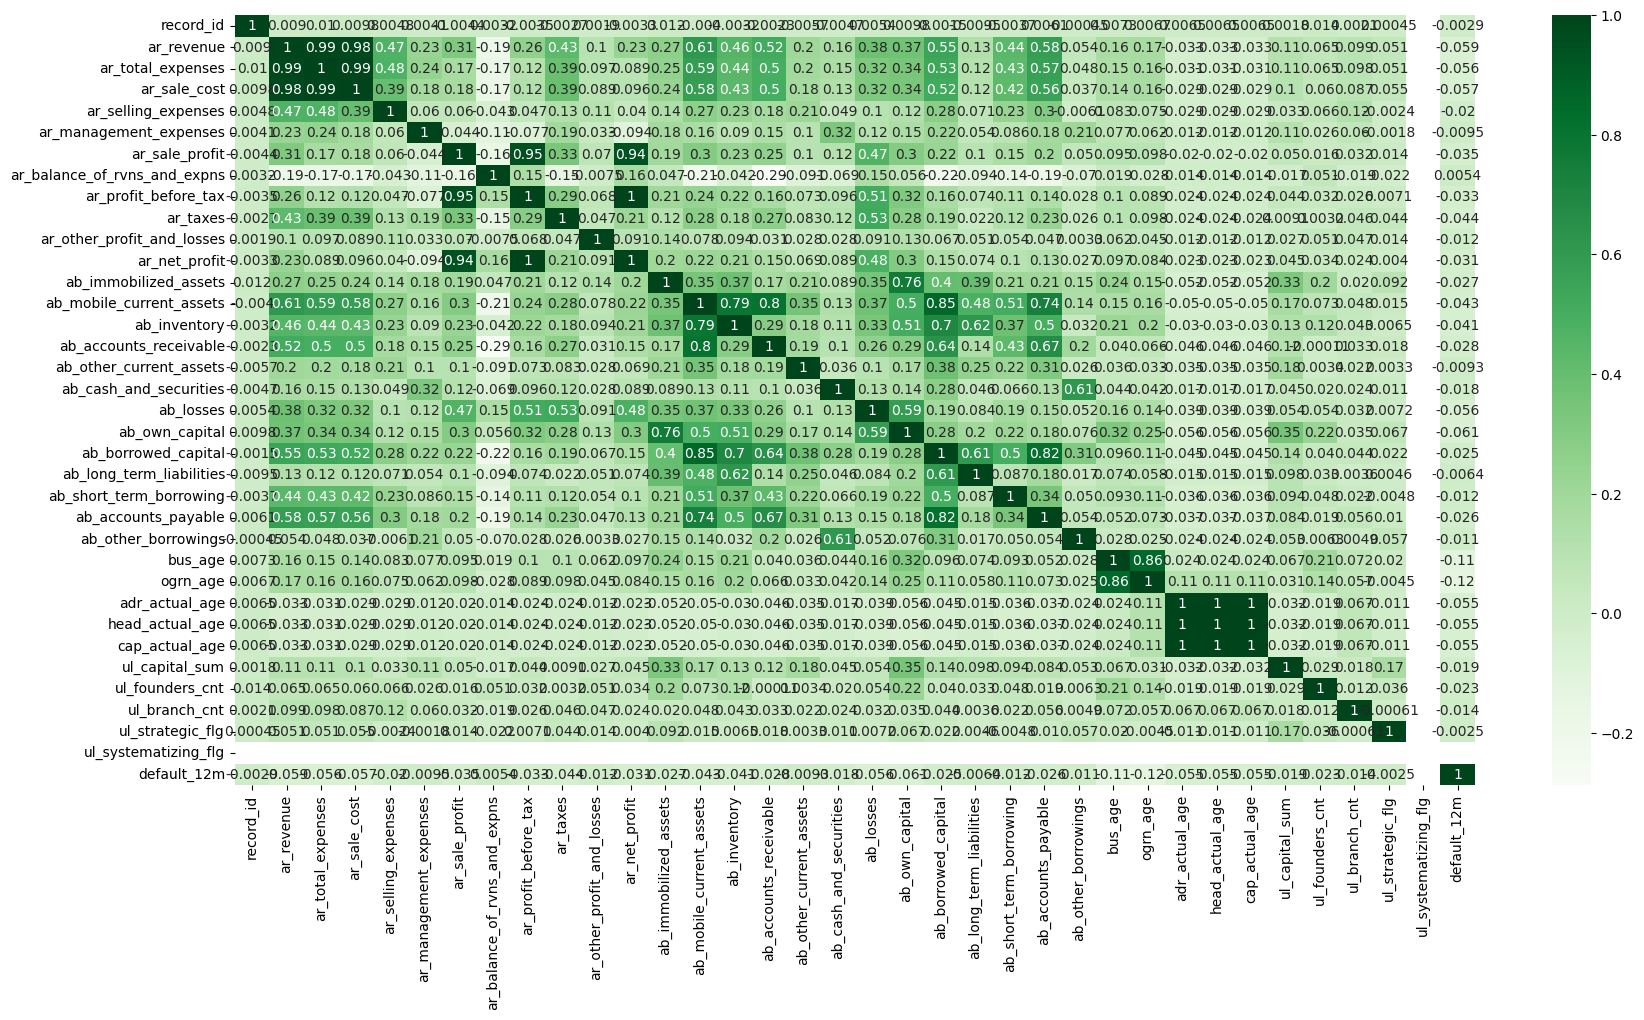

In [110]:
plt.figure(figsize=(20, 10))
sns.heatmap(data=train_df.corr(), annot=True, cmap = "Greens")

In [111]:
train_features = ['record_id', 'default_12m', 'ar_revenue', 'ar_total_expenses', 'ar_sale_cost', 'ar_profit_before_tax', 'ar_net_profit', 'ab_inventory',
    'ab_accounts_receivable', 'ab_own_capital', 'ab_borrowed_capital', 'ab_accounts_payable', 'ogrn_age', 'adr_actual_age',
    'head_actual_age', 'cap_actual_age']

test_features = ['record_id', 'ar_revenue', 'ar_total_expenses', 'ar_sale_cost', 'ar_profit_before_tax', 'ar_net_profit', 'ab_inventory',
    'ab_accounts_receivable', 'ab_own_capital', 'ab_borrowed_capital', 'ab_accounts_payable', 'ogrn_age', 'adr_actual_age',
    'head_actual_age', 'cap_actual_age']

train_df = train_df[train_features]
test_df = test_df[test_features]

# Data Preprocessing and Feature Selection

In [112]:
# MinMaxScaler for data normalization
# KNNImputer is a distance-based imputation method,
# so it needs normalization before imputing
scaler = MinMaxScaler()
record_id = train_df['record_id']
default = train_df['default_12m']
train_df = pd.DataFrame(scaler.fit_transform(train_df.drop(['default_12m', 'record_id'], axis=1)), columns = train_df.drop(['default_12m', 'record_id'], axis=1).columns)
train_df['record_id'] = record_id
train_df['default_12m'] = default
# df_normalized = scaler.fit_transform(df.drop(['target', 'id'], axis=1))
record_id = test_df['record_id']
test_df = pd.DataFrame(scaler.fit_transform(test_df.drop('record_id', axis=1)), columns = test_df.drop('record_id', axis=1).columns)
test_df['record_id'] = record_id

In [113]:
train_df = train_df.dropna(axis=0)
test_df = test_df.dropna(axis=0)

# Cross-Validation

In [118]:
# Get a list of models to evaluate
def get_models():
    models = dict()
    models['SGDRegressor'] = SGDRegressor()
    # models['KernelRidge'] = KernelRidge()
    models['LinearSVR'] = LinearSVR()
    models['MLPRegressor'] = MLPRegressor()
    models['HuberRegressor'] = HuberRegressor()
    models['PassiveAggressiveRegressor'] = PassiveAggressiveRegressor()
    models['Lars'] = Lars()
    models['Lasso'] = Lasso()
    models['LassoLars'] = LassoLars()
    models['LassoLarsCV'] = LassoLarsCV()
    # models['LassoLarsIC'] = LassoLarsIC()
    # models['GaussianProcessRegressor'] = GaussianProcessRegressor()
    models['TweedieRegressor'] = TweedieRegressor()
    models['OrthogonalMatchingPursuit'] = OrthogonalMatchingPursuit()
    models['ExtraTreesRegressor'] = ExtraTreesRegressor()
    models['DecisionTreeRegressor'] = DecisionTreeRegressor()
    models['TransformedTargetRegressor'] = TransformedTargetRegressor()
    models['KNeighborsRegressor'] = KNeighborsRegressor()
    models['GradientBoostingRegressor'] = GradientBoostingRegressor()
    models['SVR'] = SVR()
    models['NuSVR'] = NuSVR()
    models['RandomForestRegressor'] = RandomForestRegressor()
    models['LarsCV'] = LarsCV()
    models['LassoCV'] = LassoCV()
    models['BayesianRidge'] = BayesianRidge()
    models['ElasticNet'] = ElasticNet()
    models['ElasticNetCV'] = ElasticNetCV()
    models['DummyRegressor'] = DummyRegressor()
    models['AdaBoostRegressor'] = AdaBoostRegressor()
    models['BaggingRegressor'] = BaggingRegressor()
    models['Ridge'] = Ridge()
    models['RidgeCV'] = RidgeCV()
    # models['Stacking'] = get_stacking()
    return models

In [115]:
# Evaluate a given model using cross-validation
def mape_evaluate_model(model, x, y):
    start_time = time.time()
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_percentage_error', cv=cv, n_jobs=-1, error_score='raise')
    run_time = time.time() - start_time
    return scores, run_time

In [116]:
# Get a stacking ensemble of models
def get_stacking():
    # Defining the base models
    level0 = list()
    level0.append(('SGDRegressor', SGDRegressor()))
    level0.append(('KernelRidge', KernelRidge()))
    level0.append(('LinearSVR', LinearSVR()))
    level0.append(('MLPRegressor', MLPRegressor()))
    # Defining meta learner model
    level1 = LinearRegression()
    # Defining the stacking ensemble
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model

In [119]:
# Get the models to evaluate
models = get_models()
mape_results, names, runs = list(), list(), list()

# Evaluate the models and store results
for name, model in models.items():
    mape_scores, run_time = mape_evaluate_model(model, train_df.drop('default_12m', axis=1), train_df['default_12m'])
    mape_results.append(mape_scores)
    names.append(name)
    runs.append(run_time)
    print(name, "| MAPE:", mean(mape_scores), "| Standard Deviation:", std(mape_scores),"| Time Taken:", run_time)

SGDRegressor | MAPE: -1.2066884791235625e+34 | Standard Deviation: 8.147432430428873e+33 | Time Taken: 5.682690143585205


/Users/litwein/opt/anaconda3/envs/dl/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/Users/litwein/opt/anaconda3/envs/dl/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/Users/litwein/opt/anaconda3/envs/dl/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/Users/litwein/opt/anaconda3/envs/dl/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/Users/litwein/opt/anaconda3/envs/dl/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/User

LinearSVR | MAPE: -513090742448813.6 | Standard Deviation: 1898267518924767.8 | Time Taken: 9.107661962509155
MLPRegressor | MAPE: -1.6980833311712658e+16 | Standard Deviation: 4.749500898557262e+16 | Time Taken: 7.404731035232544
HuberRegressor | MAPE: -120606225.79203519 | Standard Deviation: 282198402.20770305 | Time Taken: 1.2140331268310547
PassiveAggressiveRegressor | MAPE: -448686664602893.4 | Standard Deviation: 821229686774528.9 | Time Taken: 0.3168830871582031


/Users/litwein/opt/anaconda3/envs/dl/lib/python3.7/site-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/Users/litwein/opt/anaconda3/envs/dl/lib/python3.7/site-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To repro

Lars | MAPE: -230387976883429.78 | Standard Deviation: 47976766154243.82 | Time Taken: 0.28708386421203613
Lasso | MAPE: -198254387397963.34 | Standard Deviation: 3189691202296.017 | Time Taken: 2.163038969039917


/Users/litwein/opt/anaconda3/envs/dl/lib/python3.7/site-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/Users/litwein/opt/anaconda3/envs/dl/lib/python3.7/site-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use

LassoLars | MAPE: -198239344484811.72 | Standard Deviation: 3183255450434.72 | Time Taken: 0.2146739959716797


/Users/litwein/opt/anaconda3/envs/dl/lib/python3.7/site-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/Users/litwein/opt/anaconda3/envs/dl/lib/python3.7/site-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, u

LassoLarsCV | MAPE: -198893152274251.7 | Standard Deviation: 3792705526657.9775 | Time Taken: 0.42234301567077637
TweedieRegressor | MAPE: -193150075948400.78 | Standard Deviation: 3011400063711.273 | Time Taken: 0.26567888259887695


/Users/litwein/opt/anaconda3/envs/dl/lib/python3.7/site-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), OrthogonalMatchingPursuit())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/Users/litwein/opt/anaconda3/envs/dl/lib/python3.7/site-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preproce

OrthogonalMatchingPursuit | MAPE: -196632180934031.28 | Standard Deviation: 3378451464390.397 | Time Taken: 0.20256996154785156
ExtraTreesRegressor | MAPE: -230223142690382.28 | Standard Deviation: 7336171802862.665 | Time Taken: 9.75810694694519
DecisionTreeRegressor | MAPE: -201726452874295.88 | Standard Deviation: 21241495547933.875 | Time Taken: 1.2902629375457764
TransformedTargetRegressor | MAPE: -200296655868996.97 | Standard Deviation: 3945340187505.9883 | Time Taken: 0.3728001117706299
KNeighborsRegressor | MAPE: -195147281244745.94 | Standard Deviation: 12833393437620.635 | Time Taken: 1.753185749053955
GradientBoostingRegressor | MAPE: -193679240205697.94 | Standard Deviation: 4252932233723.48 | Time Taken: 26.49657106399536
SVR | MAPE: -429226033286259.75 | Standard Deviation: 2078836987795.2058 | Time Taken: 10.816190958023071
NuSVR | MAPE: -1028490845285.2732 | Standard Deviation: 159215125740.1852 | Time Taken: 23.156250953674316
RandomForestRegressor | MAPE: -2261242143

/Users/litwein/opt/anaconda3/envs/dl/lib/python3.7/site-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LarsCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/Users/litwein/opt/anaconda3/envs/dl/lib/python3.7/site-packages/sklearn/linear_model/_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 9 iterations, i.e. alpha=5.645e-06, with an active set of 8 regressors, and the smallest cholesky pivot element bei

LarsCV | MAPE: -198006801462946.0 | Standard Deviation: 3574709930519.803 | Time Taken: 0.46955108642578125
LassoCV | MAPE: -198111691131195.97 | Standard Deviation: 3167621915738.5566 | Time Taken: 0.7225489616394043
BayesianRidge | MAPE: -197868420294703.66 | Standard Deviation: 3812143633273.8765 | Time Taken: 0.37189793586730957
ElasticNet | MAPE: -198254555873856.44 | Standard Deviation: 3189694436401.7256 | Time Taken: 0.2159717082977295
ElasticNetCV | MAPE: -198111700124501.53 | Standard Deviation: 3167544747359.228 | Time Taken: 0.7216389179229736
DummyRegressor | MAPE: -198239344484811.72 | Standard Deviation: 3183255450434.72 | Time Taken: 0.1878206729888916
AdaBoostRegressor | MAPE: -195784062255308.53 | Standard Deviation: 8852974920678.195 | Time Taken: 2.4422550201416016
BaggingRegressor | MAPE: -219027237529779.03 | Standard Deviation: 8050058203589.685 | Time Taken: 8.076988935470581
Ridge | MAPE: -199349688423689.2 | Standard Deviation: 3854862503786.391 | Time Taken: 

KeyboardInterrupt: 

# Model Selection

In [ ]:
mape_mean_results, mape_std_results = list(), list()
r2_mean_results, r2_std_results = list(), list()
for value in range(len(mape_results)):
    mape_mean_results.append(mean(mape_results[value]))
    mape_std_results.append(std(mape_results[value]))

In [ ]:
data = {'Name':names, 'MAPE':mape_mean_results, 'Standart Deviation':mape_std_results, 'Time Taken':runs}
df_models = pd.DataFrame(data)
df_models.set_index('Name', inplace=True)
df_models

In [ ]:
line = px.line(data_frame = df_models.sort_values('Time Taken', ascending=True),y =['Time Taken'], markers = True)
line.update_xaxes(title="Model", rangeslider_visible = False)
line.update_yaxes(title = "Time (s)")
line.update_traces(line_color="red")
line.update_layout(showlegend = True,
                   title = {
                       'text': 'Time Taken vs Model',
                       'y':0.94,
                       'x':0.5,
                       'xanchor': 'center',
                       'yanchor': 'top'})

line.show()

In [ ]:
line = px.line(data_frame = df_models.sort_values('MAPE', ascending=False),y =['MAPE'], markers = True)
line.update_xaxes(title="Model", rangeslider_visible = False)
line.update_yaxes(title = "MAPE Score")
line.update_traces(line_color="blue")
line.update_layout(showlegend = True,
                   title = {
                       'text': 'MAPE vs Model',
                       'y':0.94,
                       'x':0.5,
                       'xanchor': 'center',
                       'yanchor': 'top'})

line.show()

In [ ]:
line = px.line(data_frame = df_models.sort_values('Standart Deviation', ascending=True),y =['Standart Deviation'], markers = True)
line.update_xaxes(title="Model", rangeslider_visible = False)
line.update_yaxes(title = "Standart Deviation")
line.update_traces(line_color="purple")
line.update_layout(showlegend = True,
                   title = {
                       'text': 'Standart Deviation vs Model',
                       'y':0.94,
                       'x':0.5,
                       'xanchor': 'center',
                       'yanchor': 'top'})

line.show()

# Modeling

In [ ]:
# Define the base models
level0 = list()
level0.append(('SGDRegressor', SGDRegressor()))
level0.append(('KernelRidge', KernelRidge()))
level0.append(('LinearSVR', LinearSVR()))
level0.append(('MLPRegressor', MLPRegressor()))
# Define meta learner model
level1 = LinearRegression()
# Define the stacking ensemble
model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)

# Fit the model on all available data
model.fit(train_df.drop('target', axis=1), train_df['target'])
# Predict the results
predictions = model.predict(test_df.drop('target', axis=1))
print("Predicted Values:", predictions)